In [1]:
cd /home/jovyan/Documents/dsi_plus/Projects/project_3 - Madelon_feature_selection

/home/jovyan/Documents/dsi_plus/Projects/project_3 - Madelon_feature_selection


In [2]:
#Import standard modules
%run lib/__init__.py
%matplotlib inline

### Project 3: Madelon Dataset - Feature Selection + Classification


### Step 1 - Benchmarking

Benchmark scores of the classification models, using default hyperparameters, on the raw data.

- build pipeline to perform a naive fit for each of the base model classes:
	- logistic regression
	- decision tree (classifier)
	- k nearest neighbors
	- support vector classifier
- in order to do this, you will need to set a high `C` value in order to perform minimal regularization, in the case of logistic regression and support vector classifier.

To score models use
    * accuracy
    * ROC
    

Calculate bench marks for
    * Madelon dataset
    * Postgres Sample1 , Sample2 and Sample3
    
Split each dataset into Train and Test sets. The Test set will be scored now and then wil not be used until the final model has been built. 

Hold out 25% of each set, use a random_state = 42 so that the benchmarks will remain fixed if thie notebook has to be rerun.

In [3]:
benchmarks=pd.DataFrame()

### 1. Load data set 

In [4]:
#Load files names for datasets
pickle_files=Pickle_files()
datafiles=pickle_files.read_datafiles()

### 2. Build pipleines for benchmarks


In [5]:
#set random seed so benchmarks remain stable
import random
random.seed(42)

In [6]:
classifiers={
            'LogReg': LogisticRegression(C=1000 ),
            'DTr': DecisionTreeClassifier(),
            'KNN': KNeighborsClassifier(),
            'SVC': SVC(C=1000)
            }

In [7]:
def pickle_data(s,l):
    
    for i, j in enumerate(l):
        j.to_pickle(datafiles[s][i+2])
        j_check=pd.read_pickle(datafiles[s][i+2]) 
        c=j_check.equals(j)
        print('file : {} - saved correctly {}, data shape saved  {}'.format(datafiles[s][i+2],c, j.shape))
   
    return

In [8]:
def naieve_benchmark(s,X,y,classifiers):
    '''build pipelines for each classifier in list '''
    results=[]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20)
    
    #savesplit
    pickle_data(s,[X_train,X_test,y_train,y_test])
    
    for n,clf in classifiers.items():
        pipe=Pipeline(steps=[('scaler' , None),
                                 ('clf' , clf)
                            ])
        pipe.fit(X_train,y_train.squeeze())
        results.append({'dataset': s,
                        'classifier': n,
                        'model': clf,
                        'train_score': pipe.score(X_train,y_train.squeeze()),
                        'test_score': pipe.score(X_test,y_test.squeeze())
                             })
    benchmark_scores=pd.DataFrame(results)
    return benchmark_scores

### 3. Score datasets

#### UCI

In [9]:
XU=pd.read_pickle(datafiles['UCI'][0])
yU=pd.read_pickle(datafiles['UCI'][1])

In [10]:
XU.shape, yU.shape

((2600, 500), (2600, 1))

In [11]:
%%time
benchmarksUCI=naieve_benchmark('UCI',XU,yU,classifiers)

file : ./data/pickle_data/UCI_X_train - saved correctly True, data shape saved  (2080, 500)
file : ./data/pickle_data/UCI_X_test - saved correctly True, data shape saved  (520, 500)
file : ./data/pickle_data/UCI_y_train - saved correctly True, data shape saved  (2080, 1)
file : ./data/pickle_data/UCI_y_test - saved correctly True, data shape saved  (520, 1)
CPU times: user 6.45 s, sys: 130 ms, total: 6.58 s
Wall time: 6.48 s


In [ ]:
benchmarksUCI.drop('model',axis=1, inplace=True)

In [16]:
benchmarksUCI

,classifier,dataset,test_score,train_score
0,LogReg,UCI,0.478846,0.505288
1,DTr,UCI,0.721154,1.000000
2,KNN,UCI,0.465385,0.683654
3,SVC,UCI,0.478846,0.983173


#### Sample1

In [18]:
XS1=pd.read_pickle(datafiles['Sample1'][0])
yS1=pd.read_pickle(datafiles['Sample1'][1])

In [19]:
XS1.shape, yS1.shape

((9206, 1000), (9206,))

In [20]:
%%time
benchmarksS1=naieve_benchmark('Sample1',XS1,yS1,classifiers)

file : ./data/pickle_data/Sample1_X_train - saved correctly True, data shape saved  (7364, 1000)
file : ./data/pickle_data/Sample1_X_test - saved correctly True, data shape saved  (1842, 1000)
file : ./data/pickle_data/Sample1_y_train - saved correctly True, data shape saved  (7364,)
file : ./data/pickle_data/Sample1_y_test - saved correctly True, data shape saved  (1842,)
CPU times: user 5min 57s, sys: 670 ms, total: 5min 58s
Wall time: 5min 58s


#### Sample2

In [21]:
XS2=pd.read_pickle(datafiles['Sample2'][0])
yS2=pd.read_pickle(datafiles['Sample2'][1])

In [22]:
XS2.shape, yS2.shape

((9157, 1000), (9157,))

In [23]:
%%time
benchmarksS2=naieve_benchmark('Sample2',XS2,yS2,classifiers)

file : ./data/pickle_data/Sample2_X_train - saved correctly True, data shape saved  (7325, 1000)
file : ./data/pickle_data/Sample2_X_test - saved correctly True, data shape saved  (1832, 1000)
file : ./data/pickle_data/Sample2_y_train - saved correctly True, data shape saved  (7325,)
file : ./data/pickle_data/Sample2_y_test - saved correctly True, data shape saved  (1832,)
CPU times: user 5min 44s, sys: 600 ms, total: 5min 45s
Wall time: 5min 45s


#### Sample3

In [24]:
XS3=pd.read_pickle(datafiles['Sample3'][0])
yS3=pd.read_pickle(datafiles['Sample3'][1])

In [25]:
XS3.shape, yS3.shape

((9126, 1000), (9126,))

In [26]:
%%time
benchmarksS3=naieve_benchmark('Sample3',XS3,yS3,classifiers)

file : ./data/pickle_data/Sample3_X_train - saved correctly True, data shape saved  (7300, 1000)
file : ./data/pickle_data/Sample3_X_test - saved correctly True, data shape saved  (1826, 1000)
file : ./data/pickle_data/Sample3_y_train - saved correctly True, data shape saved  (7300,)
file : ./data/pickle_data/Sample3_y_test - saved correctly True, data shape saved  (1826,)
CPU times: user 5min 55s, sys: 770 ms, total: 5min 56s
Wall time: 5min 56s


#### Consolidate benchmarks

In [27]:
benchmarkS=pd.concat([benchmarksS1,benchmarksS2,benchmarksS3], axis=0,ignore_index=True)

In [33]:
benchmarksUCI.to_pickle('./data/pickle_data/UCI_benchmarks')

In [31]:
benchmarkS.drop('model',axis=1,inplace=True )

In [32]:
benchmarkS.to_pickle('./data/pickle_data/Samples_benchmarks')

In [34]:
list(benchmarksUCI.classifier.values)

['LogReg', 'DTr', 'KNN', 'SVC']

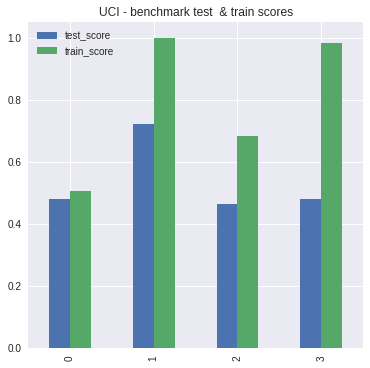

In [35]:
fig=plt.figure(figsize=(6,6))
ax1=fig.add_subplot(111)
benchmarksUCI.plot.bar(ax=ax1)
ax1.set_xticks(range(4),list(benchmarksUCI.classifier.values))
ax1.set_title('UCI - benchmark test  & train scores')
plt.show()
fig.savefig('./images/01-UCI-benchmarks-barcht.jpg')

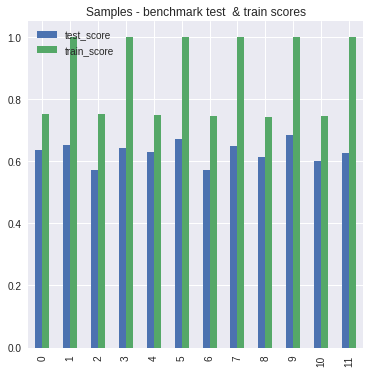

In [36]:
fig=plt.figure(figsize=(6,6))
ax1=fig.add_subplot(111)
benchmarkS.plot.bar(ax=ax1)
ax1.set_xticks(range(12),list(benchmarkS.classifier.values))
ax1.set_title('Samples - benchmark test  & train scores')
plt.show()
fig.savefig('./images/01-Samples-benchmarks-barcht.jpg')

In [37]:
benchmark=pd.read_pickle('./data/pickle_data/Samples_benchmarks')
benchmarksUCI=pd.read_pickle('./data/pickle_data/UCI_benchmarks')

In [38]:
benchmark

,classifier,dataset,test_score,train_score
0,LogReg,Sample1,0.636265,0.751630
1,DTr,Sample1,0.652552,1.000000
2,KNN,Sample1,0.571118,0.751494
3,SVC,Sample1,0.641151,1.000000
4,LogReg,Sample2,0.629367,0.747986
5,DTr,Sample2,0.671397,1.000000
6,KNN,Sample2,0.572052,0.746348
7,SVC,Sample2,0.649017,1.000000
8,LogReg,Sample3,0.613910,0.741096
9,DTr,Sample3,0.684009,1.000000


In [39]:
benchmarksUCI

,classifier,dataset,test_score,train_score
0,LogReg,UCI,0.478846,0.505288
1,DTr,UCI,0.721154,1.000000
2,KNN,UCI,0.465385,0.683654
3,SVC,UCI,0.478846,0.983173
